Using synthetic data for demonstration
MSE with 4 lag variables: 5.666252
MSE with 8 lag variables: 5.653610
The MSE decreases when the number of lag variables increases.
The answer is: (b) Decreases


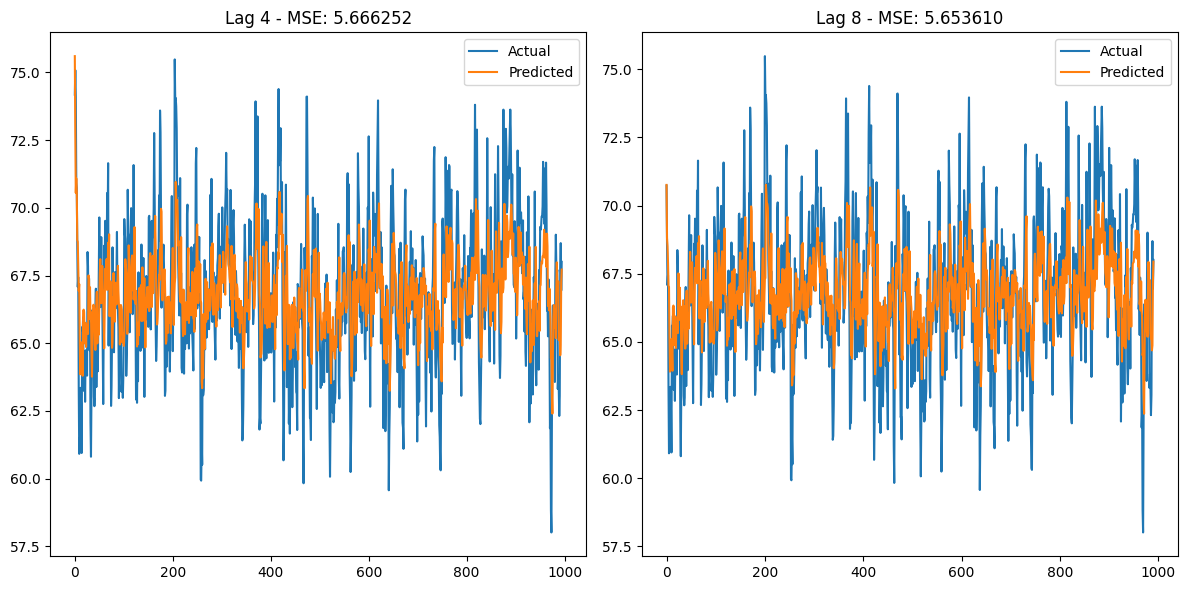


Feature Importance (Lag 4):
Lag 1: 0.483975
Lag 2: 0.018267
Lag 3: -0.054213
Lag 4: 0.045672

Feature Importance (Lag 8):
Lag 1: 0.487836
Lag 2: 0.016338
Lag 3: -0.061731
Lag 4: 0.023596
Lag 5: 0.041044
Lag 6: 0.000560
Lag 7: -0.059786
Lag 8: 0.035335


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to create lag features and prepare dataset
def create_lag_features(data, target_col, n_lags):
    df = data.copy()

    # Create lag features
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df[target_col].shift(i)

    # Create target variable (next day's consumption)
    df['target'] = df[target_col].shift(-1)

    # Drop NaN values created by shifting
    df = df.dropna()

    # Extract X (features) and y (target)
    X = df.iloc[:, 1:n_lags+1].values  # Exclude the original consumption column and target
    y = df['target'].values

    return X, y, df

# Load the dataset
try:
    data = pd.read_csv('auto-regressive-data.csv')
    print("Dataset loaded successfully")
except:
    # If the file doesn't exist, create a synthetic dataset for demonstration
    print("Using synthetic data for demonstration")
    np.random.seed(42)
    n = 1000
    # Create an autoregressive series
    consumption = np.zeros(n)
    consumption[0] = np.random.normal(100, 10)
    for i in range(1, n):
        consumption[i] = 0.7 * consumption[i-1] + 0.2 * np.random.normal(100, 10)

    data = pd.DataFrame({'Consumption': consumption})

# Function to train model and evaluate
def train_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse, y_pred, model

# Experiment with lag = 4
X_lag4, y_lag4, df_lag4 = create_lag_features(data, 'Consumption', 4)
mse_lag4, y_pred_lag4, model_lag4 = train_and_evaluate(X_lag4, y_lag4)

# Experiment with lag = 8
X_lag8, y_lag8, df_lag8 = create_lag_features(data, 'Consumption', 8)
mse_lag8, y_pred_lag8, model_lag8 = train_and_evaluate(X_lag8, y_lag8)

# Print results
print(f"MSE with 4 lag variables: {mse_lag4:.6f}")
print(f"MSE with 8 lag variables: {mse_lag8:.6f}")

if mse_lag8 < mse_lag4:
    print("The MSE decreases when the number of lag variables increases.")
    result = "(b) Decreases"
elif mse_lag8 > mse_lag4:
    print("The MSE increases when the number of lag variables increases.")
    result = "(a) Increases"
elif mse_lag8 == mse_lag4:
    print("The MSE stays the same when the number of lag variables increases.")
    result = "(c) Stays the same"
else:
    print("The MSE becomes zero when the number of lag variables increases.")
    result = "(d) Becomes zero"

print(f"The answer is: {result}")

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot for lag 4
plt.subplot(1, 2, 1)
plt.plot(y_lag4, label='Actual')
plt.plot(y_pred_lag4, label='Predicted')
plt.title(f'Lag 4 - MSE: {mse_lag4:.6f}')
plt.legend()

# Plot for lag 8
plt.subplot(1, 2, 2)
plt.plot(y_lag8, label='Actual')
plt.plot(y_pred_lag8, label='Predicted')
plt.title(f'Lag 8 - MSE: {mse_lag8:.6f}')
plt.legend()

plt.tight_layout()
plt.show()

# Further analysis - feature importance
print("\nFeature Importance (Lag 4):")
for i, coef in enumerate(model_lag4.coef_):
    print(f"Lag {i+1}: {coef:.6f}")

print("\nFeature Importance (Lag 8):")
for i, coef in enumerate(model_lag8.coef_):
    print(f"Lag {i+1}: {coef:.6f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Set random seed for reproducibility
np.random.seed(42)

# Problem parameters
n = 50  # Number of basis functions
num_samples = 10000  # Number of samples to generate

# Generate random values from uniform distribution [0,1]
p = np.random.uniform(0, 1, num_samples)

# Calculate target variable b
b = np.sin(10 * p)

# Function to evaluate the j-th basis function at point t
def basis_function(j, t, n):
    # Outside the interval [j-1/n, j/n], function is 0
    if t < (j-1)/n or t > j/n:
        return 0

    # Calculate midpoint delta
    delta = (j-1)/n + (j/n - (j-1)/n)/2

    # Triangle function defined by three points:
    # ((j-1)/n, 0), (j/n, 0), and (delta, 1)
    if t <= delta:
        # Left side of triangle
        return (t - (j-1)/n) / (delta - (j-1)/n)
    else:
        # Right side of triangle
        return (j/n - t) / (j/n - delta)

# Create matrix A where each column represents applying a basis function to all points
A = np.zeros((num_samples, n))
for j in range(1, n+1):
    for i in range(num_samples):
        A[i, j-1] = basis_function(j, p[i], n)

# Solve the least squares problem Ax = b
x, residuals, rank, singular_values = lstsq(A, b)

# Calculate predictions
predictions = A @ x

# Calculate Mean Squared Error
mse = np.mean((predictions - b)**2)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize results
def plot_results():
    # Sort points by p value for cleaner visualization
    sort_idx = np.argsort(p)
    p_sorted = p[sort_idx]
    b_sorted = b[sort_idx]
    pred_sorted = predictions[sort_idx]

    plt.figure(figsize=(12, 6))

    # Plot ground truth and predictions
    plt.subplot(2, 1, 1)
    plt.plot(p_sorted, b_sorted, 'b-', label='Ground Truth')
    plt.plot(p_sorted, pred_sorted, 'r-', label='Predictions')
    plt.xlabel('p')
    plt.ylabel('Value')
    plt.title('Ground Truth vs Predictions')
    plt.legend()

    # Plot basis functions
    plt.subplot(2, 1, 2)
    t = np.linspace(0, 1, 1000)
    for j in range(1, n+1, n//10):  # Plot every 5th basis function for clarity
        y = [basis_function(j, t_val, n) for t_val in t]
        plt.plot(t, y, label=f'f_{j}')

    plt.xlabel('t')
    plt.ylabel('f_j(t)')
    plt.title('Sample Basis Functions')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Uncomment to visualize the results
# plot_results()

# Compare with the given options
options = [0.12, 0.01, 1.90, 2.31]
closest_option = min(options, key=lambda x: abs(x - mse))
print(f"The closest MSE from the given options is: {closest_option}")
print(f"The corresponding answer is: ({chr(97 + options.index(closest_option))}) {closest_option}")

Mean Squared Error: 0.1204
The closest MSE from the given options is: 0.12
The corresponding answer is: (a) 0.12


In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate vector p
p = np.random.uniform(0, 1, 10000)

# 2. Create target variable b
b = 7*p - 3*p**2

# 3. Create matrix A with the basis functions
n = 10
A = np.zeros((len(p), n))

# For each point p_i, evaluate all basis functions
for i in range(len(p)):
    t = p[i]  # Each p_i can be considered as a point t
    for j in range(1, n+1):
        # Check if t is in the interval [(j-1)/n, j/n]
        if (j-1)/n <= t < j/n:
            # Calculate δ (midpoint)
            delta = ((j-1)/n + j/n) / 2

            # Triangle function calculation
            # If t is between (j-1)/n and delta
            if t < delta:
                A[i, j-1] = (t - (j-1)/n) / (delta - (j-1)/n)
            # If t is between delta and j/n
            else:
                A[i, j-1] = (j/n - t) / (j/n - delta)

# 4. Solve least squares problem Ax = b
x = np.linalg.lstsq(A, b, rcond=None)[0]

# 5. Predict values and calculate MSE
b_pred = A @ x
mse = np.mean((b - b_pred)**2)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.8876132323231973


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate random vectors p, q ∈ ℝ¹⁰⁰ from uniform distribution [-10, 10]
p = np.random.uniform(-10, 10, 100)
q = np.random.uniform(-10, 10, 100)

# 2. Create target variable b
b = np.where(p * q > 1, 1, -1)

# 3. Define basis functions
def f0(p, q): return np.ones_like(p)
def f1(p, q): return p
def f2(p, q): return q
def f3(p, q): return p**2
def f4(p, q): return q**2
def f5(p, q): return p*q

# 4. Create matrix A
A = np.zeros((100, 6))
A[:, 0] = f0(p, q)
A[:, 1] = f1(p, q)
A[:, 2] = f2(p, q)
A[:, 3] = f3(p, q)
A[:, 4] = f4(p, q)
A[:, 5] = f5(p, q)

# 5. Use least squares to find coefficient vector x
x = np.linalg.lstsq(A, b, rcond=None)[0]

# 6. Make predictions
b_pred = A @ x

# 7. Calculate Mean Squared Error
mse = mean_squared_error(b, b_pred)
print(f"Coefficient vector x: {x}")
print(f"Mean Squared Error: {mse:.4f}")

# Check which option is closest
options = [0.90, 0.91, 0.99, 1.2]
closest_option = min(options, key=lambda option: abs(option - mse))
print(f"Closest option: {closest_option}")

Coefficient vector x: [-0.17212763  0.00405981  0.01175784  0.00085751  0.00092815  0.02338672]
Mean Squared Error: 0.3771
Closest option: 0.9
